EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 1: Python
## Due 2 October, 2019 at 6:00 PM
### <span style="color: red">YOUR NAME HERE</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Get Jupyter running on your computer, or learn to use Google Colab's Jupyter environment.
- Make sure you can click through the Lecture 1 notes on Python. Try change some of the cells to see the effects. 
- If you haven't done any Python, follow one of the links in Lecture 1 to a tutorial and work through it.
- If you haven't done any Numpy or Sympy, read through the linked documentation and tutorials for those too.

### 1. Whitespace
Write two short Python fragments that are syntactically correct, have exactly the same non-whitespace characters **in the same order**, do not use random number generators, but produce (e.g. print) different results.

In [2]:
print(5/2)
print(5//2)

2.5
2


### 2. Complex Numbers
Write a function `rand_complex(n)` that returns a list of `n` random complex numbers uniformly distributed in the unit circle (i.e. the magnitudes of the numbers are all between 0 and 1). Give the function a docstring. Demonstrate the function by making a list of 25 complex numbers. 

In [91]:
import matplotlib.pyplot as plt
import numpy
from numpy import array as arr
from numpy import abs
import math


def rand_complex(n: int, normalize: bool=False) -> list:
    """
    Returns a list of n random complex numbers that are uniformly distributed
        between 0 and 1.

    :bool normalize: ensure the sum of the magnitude of all elements is 1
    :return list: of uniformly distributed numbers
    """
    # get lists of n random numbers with a uniform distribution 
    #  for real and complex parts of the number
    real_parts = numpy.random.uniform(0.0, 1.0, size=n)
    complex_parts = numpy.random.uniform(0.0, 1.0, size=n)
    #complex_parts = [x*1j for x in complex_parts]
    numbers = arr(real_parts) + 1j*arr(complex_parts)

    # normalize every element but it's absolute value
    if normalize:
        magnitudes = [abs(x) for x in numbers]
        normalized_values = [numbers[i]/max(magnitudes) for i in range(len(numbers))]
        return normalized_values

    return numbers



def test_it(runs=100, epsilon=10e-7):
    # these num_*_percent variables below should both be about 10% of the number of runs
    num_below_10_percent = 0
    num_above_90_percent = 0
    for trial in range(100):
        nums = rand_complex(10, normalize=True)
        #print('run_%03d: min(%s), max(%s)' % (trial, min(nums), max(nums)))
        
        num_below_10_percent += 1 if any(x < 0.1 for x in nums) else 0
        num_above_90_percent += 1 if any(x > 0.9 for x in nums) else 0

        max_magnitude = [abs(x) for x in nums]
        #max_magnitude.sort()
        plt.plot(numpy.histogram(max_magnitude))
        assert max_magnitude[-1] <= 1.0 + epsilon, 'not properly normalized: %s' % (str(max_magnitude))
        #print('%d\n=========\n%s' % (trial, '\n'.join(['|x_%d| = %.02f, x_%d = %s' % (i, abs(nums[i]), i, str(nums[i])) for i in range(len(nums))])))
        

    
    print('number of runs: %d\n----- -----' % (runs))
    print('%% below 0.1 = %d/%d = %.02f' % (num_below_10_percent, runs, num_below_10_percent/runs))
    print('%% above 0.9 = %d/%d = %.02f' % (num_above_90_percent, runs, num_above_90_percent/runs))
    
test_it()

rand_complex(25)


ValueError: setting an array element with a sequence.

### 3. Hashes
Write a function `to_hash(L) `that takes a list of complex numbers `L` and returns an array of hashes of equal length, where each hash is of the form `{ "re": a, "im": b }`. Give the function a docstring and test it by converting a list of 25 numbers generated by your `rand_complex` function. 

### 4. Matrices

Write a function `upper_traingular(n)` that returns an $n \times n$ numpy matrix with zeros on the lower diagonal, and ones on the diagonal and upper diagonal. For example, `upper_triangular(3)` would return

```python
array([[1, 1, 1],
       [0, 1, 1],
       [0, 0, 1]])
```

In [108]:
import numpy
from numpy import array

def upper_triangular(n: int) -> array:
    ret = numpy.ones((n, n))
    for i in range(n):
        for x in range(i):
            ret[i,x] = 0
    return ret


upper_triangular(3)

array([[1., 1., 1.],
       [0., 1., 1.],
       [0., 0., 1.]])

### 5. Numpy

Write a function `convolve(M,K)` that takes an $n \times m$ matrix $M$ and a $3 \times 3$ matrix $K$ (called the kernel) and returns their convolution as in the following diagram:

<img src="http://machinelearninguru.com/_images/topics/computer_vision/basics/convolution/5.JPG" width=500>

Do not use any predefined convolution functions from numpy or scipy. Write your own. If the matrix $M$ is too small, your function should return a exception.

The matrix returned will have two fewer rows and two fewer columns than $M$. Test your function by making a $100 \times 100$ matrix of zeros and ones that as an image look like the letter X and convolve it with the kernel

$$
K = \frac{1}{16} \begin{pmatrix}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{pmatrix}
$$

Use `imshow` to display both images using subplots. 

my convolve() took 0:00:00.171786
scipy.ndimage.filters.convolve took 0:00:00
shape is different: s((100, 100)) mine((98, 98))
579 failed points out of 9604


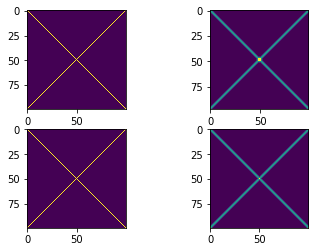

Signature: convolve(M, K, parallel=False)
Docstring:
This function convolves a $ m       imes n $ matrix with a $ 3      imes 3 $ kernel K
    The resulting matrix is $(m-2)  imes (n-2)$
File:      c:\users\pcm1289\git\ee502p\hw\<ipython-input-36-c112ad444557>
Type:      function


In [36]:
import datetime
import numpy
import matplotlib.pyplot as plt

from threading import Thread, Semaphore   # oops, not as readble :P

class InvalidKernelSize(Exception):
    pass

class InvalidOperation(Exception):
    pass

def convolve(M, K, parallel=False):
    """
    This function convolves a $ m \times n $ matrix with a $ 3 \times 3 $ kernel K
        The resulting matrix is $(m-2) \times (n-2)$
    """
    # invalid input checks
    K = numpy.array(K)
    if K.shape != (3,3):
        raise InvalidKernelSize("matrix is not 3x3: size=%d, shape=%s" % (K.size, str(K.shape)))

    M = numpy.array(M)
    if M is None or len(M.shape) != 2 or \
        M.shape[0] < K.shape[0] or M.shape[1] < K.shape[1]:
            print('M.shape = %s -- K.shape = %s' % (M.shape, K.shape))
            raise InvalidOperation('matrix is too small for operation you goofball')

    # function that can be run in parallel since calculation of each element is mutually exclusive
    def calculate_element(dest_idx, input_matrix, K, sem):
        with sem:
            final = 0
            for i in range(len(input_matrix)):
                for j in range(len(input_matrix[i])):
                    row = input_matrix[i]
                    final += row[j]*K[i,j]

        resulting_array[dest_idx[0], dest_idx[1]] = final

    resulting_array = numpy.zeros((M.shape[0]-2, M.shape[1]-2))
    sem = Semaphore(1 if not parallel else 30)
    pool = []

    for i in range(len(M)-2):
        for j in range(len(M[i])-2):
            kwargs = {
                'dest_idx': (i,j),
                'input_matrix': M[i:i+3,j:j+3],
                'K': K,
                'sem': sem,
            }
            t = Thread(target=calculate_element, kwargs=kwargs)
            if parallel:
                t.start()
                pool.append(t)
            else:
                t.run()

    for t in pool:
        t.join()

    return resulting_array


def get_x(n, w=3):
    """
    Gets an NxN array of mostly 0s with 1s in the shape of an X
        across the diagonals (width of w)
    """
    ret = numpy.zeros((n,n))
    for i in range(n):

        ret[i, i:i+w] = 1

        if i == 0:
            ret[i,-1] = 1
            offset = 1
        else:
            offset = 0
        start = -(i+w)
        stop = -(i+offset)
        ret[i, start:stop] = 1

#         print('i=%d, w=%d' % (i, w), end=' || ')
#         print('start=%d, stop=%d, offset=%d' % (start, stop, offset))

#         if i == 3:
#             return ret

    return ret

compare_to_scipy = True
if compare_to_scipy:
    subplot_dims = (2,2)
else:
    subplot_dims = (1,2)


x = get_x(100, w=1)
K = (1/16)*numpy.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1],
])

# plotting my function
plt.subplots(*subplot_dims)
plt.subplot(*subplot_dims,1)
plt.imshow(x)

plt.subplot(*subplot_dims,2)
start = datetime.datetime.now()
conv_x = convolve(x, K=K)
print('my convolve() took %s' % (datetime.datetime.now() - start))
plt.imshow(conv_x)

if compare_to_scipy:
    # uncomment for sanity check
    plt.subplot(*subplot_dims,3)
    plt.imshow(x)

    import scipy, scipy.ndimage
    plt.subplot(*subplot_dims,4)
    start = datetime.datetime.now()
    c = scipy.ndimage.filters.convolve(x, K)
    print('scipy.ndimage.filters.convolve took %s' % (datetime.datetime.now() - start))
    plt.imshow(c)
    
    if c.shape != conv_x.shape:
        print('shape is different: s(%s) mine(%s)' % (c.shape, conv_x.shape))
        
    # quick count of number of different points in my convolution vs. scipy
    fails = []
    for i in range(len(c)-2):
        for j in range(len(c[i])-2):
            #print('i=%d j=%d' % (i,j))
            if c[i,j] != conv_x[i,j]:
                fails.append((i,j))
    print('%d failed points out of %d' % (len(fails), (len(c)-2)*(len(c[0])-2)))

?convolve

### 6. Visualization

Write a function `show_pascal(n)` that returns a plot of Pascal's triangle in the following form. It should work for any number of of rows $n$ and must show the hexagons. Use a keyword argument that defaults to `True` for whether to show the numbers. Make sure the numbers are centered in the hexagons. Details like the bottom row of partial hexagons and the ellipsis are optional. Feel free to use colors and more styling. For example, if you color the hexagons black for even numbers and white for odd numbers, it will look like a Serpinski Gasket! Demonstrate the function with $n=10$ showing the numbers and for $n=50$ without the numbers. 

<img src="https://cdn.mos.cms.futurecdn.net/LH5vimYVrei3iDU2sgDM2G-650-80.jpg" width=250px>

For $n=50$ you may want to not render the edges so that the edges do not take up the whole image.

Note: A previous version of this problem required you to render $n=500$. That will be quite slow to impossible unless you use more advanced methods. If you would like to get to larger numbers of polygons it is possible. Use a PolyCollection, as in [this post](https://stackoverflow.com/questions/37573314/matplotlib-efficient-way-to-create-large-number-of-patch-objects).

### 7. Symbolic Manipulation

Use sympy to specify and solve the following equations for $x$.

- $x^2 + 2x - 1 = 0$ 
- $a x^2 + bx + c = 0$

Also, evaluate the following integrals using sympy

- $\int x^2 dx$
- $\int x e^{6x} dx$
- $\int (3t+5)\cos(\frac{t}{4}) dt$

### 8. Typesetting

Use LaTeX to typeset the following equations.

<img src="https://www.sciencealert.com/images/Equations_web.jpg">

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/dd4df8b838eb08d67530dce5a512756666204499">